In [1]:
import torch 
import torchvision
from torchvision import datasets
import numpy as np
import time
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.datasets import MNIST
import librosa
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import IPython.display as ipd
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Code for Creating the Pickle Files

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# trx = []
# s_training=[]
# path = "/content/drive/My Drive/ENGR-533/tr"
# signals = librosa.util.find_files(path, ext=['wav']) 


In [ ]:
# for y in signals: 
#     s, sr = librosa.load(y, sr=None) 
#     S = librosa.stft(s, n_fft=1024, hop_length=512)
#     trx.append(S)
#     s_training.append(s)

# training_file= { "time_signal_training":s_training , "specto)_training": trx }
# pickle.dump( training_file, open( "/content/drive/My Drive/ENGR-533/trxsave.p", "wb" ) )

In [ ]:
# validx = []
# s_valid=[]
# path = "/content/drive/My Drive/ENGR-533/v"
# signals = librosa.util.find_files(path, ext=['wav']) 

In [ ]:
# for y in signals: 
#     s, sr = librosa.load(y, sr=None) 
#     S = librosa.stft(s, n_fft=1024, hop_length=512)
#     validx.append(S)
#     s_valid.append(s)

# validation_file= { "time_signal_training":s_valid , "specto)_training": validx}
# pickle.dump( validation_file, open( "/content/drive/My Drive/ENGR-533/validation.p", "wb" ) )

In [ ]:
# testx = []
# s_test=[]
# path = "/content/drive/My Drive/ENGR-533/te"
# signals = librosa.util.find_files(path, ext=['wav']) 


In [ ]:
# for y in signals: 
#     s, sr = librosa.load(y, sr=None) 
#     S = librosa.stft(s, n_fft=1024, hop_length=512)
#     testx.append(S)
#     s_test.append(s)

# test_file= { "time_signal_training":s_test , "specto)_training": testx}
# pickle.dump( test_file, open( "/content/drive/My Drive/ENGR-533/test.p", "wb" ) )

### Loading the Pickle Files 

In [2]:
training_data = pickle.load( open( "/content/drive/My Drive/ENGR-533/trxsave.p", "rb" ) )
validation_data=pickle.load( open( "/content/drive/My Drive/ENGR-533/validation.p", "rb" ) )
test_data=pickle.load( open( "/content/drive/My Drive/ENGR-533/test.p", "rb" ) )

### Creating Test_data set

In [3]:
test_data1=test_data['specto)_training'] ## Contains the spectogram from test data

### Creating the time-signal dataset

In [4]:
## Keeping time signals
training_data_time= training_data['time_signal_training']
validation_data_time=validation_data['time_signal_training']
test_data_time=test_data['time_signal_training']

In [5]:
len(training_data['specto)_training'])

3600

### Creating the Training Dataset with sn , n and s from training data

In [6]:
### Making the training_data:
sn_training=training_data['specto)_training'][2400:3600]### Contains the mixture of noise and clean 
n_training=training_data['specto)_training'][0:1200]#### Contains the noise
s_training=training_data['specto)_training'][1200:2400]##### Contains the clean signal

### Creating the Validation Dataset with sn,n and s from validation data

In [7]:
## Making Validation data
sn_validation=validation_data['specto)_training'][2400:3600] ### Contains the mixture of noise and clean 
n_validation=validation_data['specto)_training'][0:1200] #### Contains the noise
s_validation=validation_data['specto)_training'][1200:2400] ##### Contains the clean signal

In [8]:
del training_data
del validation_data
del test_data

### Voice Signals testing


In [9]:
import IPython.display as ipd
ipd.display(ipd.Audio(librosa.core.istft(test_data1[0], hop_length=512),rate=16000))

### Function for finding the maximum columns in order to do padding

In [10]:
## Finding the maximum columns for padding:
def finding_max_column(data_inse):
  a=1
  for i in range(len(data_inse)):
    a=max(a,data_inse[i].shape[1])
  
  return a

In [11]:
max_column_training= finding_max_column(sn_training)
max_column_validation= finding_max_column(sn_validation)
max_column_test= finding_max_column(test_data1)

In [12]:
print(max_column_test,max_column_training,max_column_validation)

195 178 178


### Function for padding the training, validation and test data set

In [13]:
def function_Padded(sn_train,n_train,s_train,max_column_train):
  ### Padding the training_samples:
  for i in range (len(sn_train)):
    sn_train[i]=np.hstack((sn_train[i],np.zeros((513,max_column_train-sn_train[i].shape[1]))))
    n_train[i]=np.hstack((n_train[i],np.zeros((513,max_column_train-n_train[i].shape[1]))))
    s_train[i]= np.hstack((s_train[i],np.zeros((513,max_column_train-s_train[i].shape[1]))))
  
  return sn_train,n_train,s_train


### Padding of the training dataset

In [14]:
Sn_training_padded,N_training_padded,S_training_padded =function_Padded(sn_training,n_training,s_training,max_column_training)

In [15]:
del sn_training
del n_training
del s_training

### Padding of the validation dataset

In [16]:
Sn_validation_padded,N_validation_padded,S_validation_padded =function_Padded(sn_validation,n_validation,s_validation,max_column_validation)

In [17]:
del sn_validation
del n_validation
del s_validation

### Creating the magnitude matrix for the training Noise and Clean Signal

In [18]:
## Creating Mask Matrix for Training:
N_training_padded_magnitude=np.abs(N_training_padded)
S_training_padded_magnitude=np.abs(S_training_padded)

### Creating the magnitude matrix for the validation Noise and Clean Signal

In [19]:
## Creating Mask Matrix for Validation:
N_validation_padded_magnitude=np.abs(N_validation_padded)
S_validation_padded_magnitude=np.abs(S_validation_padded)

In [20]:
del N_training_padded
del S_training_padded
del N_validation_padded
del S_validation_padded

### Creating Mask Matrix for Training Dataset

In [21]:
a,b,c=np.shape(N_training_padded_magnitude)
Mask_Training= np.zeros((a,b,c))

In [22]:
for i in range(a):
  for j in range(b):
    for k in range (c):
      if S_training_padded_magnitude[i][j][k]>N_training_padded_magnitude[i][j][k]:
        Mask_Training[i][j][k]=1
      else:
        Mask_Training[i][j][k]=0

### Creating Mask Matrix for Validation Dataset

In [23]:
a,b,c=np.shape(N_validation_padded_magnitude)
Mask_Validation= np.zeros((a,b,c))

In [24]:
for i in range(a):
  for j in range(b):
    for k in range (c):
      if S_validation_padded_magnitude[i][j][k] > N_validation_padded_magnitude[i][j][k]:
        Mask_Validation[i][j][k]=1
      else:
        Mask_Validation[i][j][k]=0

In [25]:
Sn_training_padded_mag   = np.abs(Sn_training_padded)
Sn_validation_padded_mag = np.abs(Sn_validation_padded)

In [26]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [27]:
print(np.shape(Sn_training_padded_mag))
print(np.shape(Sn_validation_padded_mag))
print(np.shape(Mask_Training))
print(np.shape(Mask_Validation))

(1200, 513, 178)
(1200, 513, 178)
(1200, 513, 178)
(1200, 513, 178)


## Reshaping the input and mask matrix into the desired form  for both training and validation

In [28]:
Sn_reshaped_training=Sn_training_padded_mag.transpose(0,2,1)
Masked_reshaped_training= Mask_Training.transpose(0,2,1)

In [29]:
Sn_reshaped_validation=Sn_validation_padded_mag.transpose(0,2,1)
Masked_reshaped_validation= Mask_Validation.transpose(0,2,1)

In [ ]:
print(np.shape(Sn_reshaped_training))
print(np.shape(Sn_reshaped_validation))
print(np.shape(Masked_reshaped_training))
print(np.shape(Masked_reshaped_validation))

(1200, 178, 513)
(1200, 178, 513)
(1200, 178, 513)
(1200, 178, 513)


### Defining the Batch size, num_epochs

In [30]:
batch_size = 10
num_epochs = 100
num_epochs = int(num_epochs)

In [31]:
train_data = []
valid_data=[]
for i in range(len(Sn_reshaped_training)):
   train_data.append([Sn_reshaped_training[i], Masked_reshaped_training[i]])
   valid_data.append([Sn_reshaped_validation[i], Masked_reshaped_validation[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=10)
validloader = torch.utils.data.DataLoader(valid_data, shuffle=False, batch_size=1200)

In [32]:
print(np.shape(train_data))

(1200, 2, 178, 513)


In [ ]:
# class RNNModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
#         super(RNNModel, self).__init__()
#         # Hidden dimensions
#         self.hidden_dim = hidden_dim

#         # Number of hidden layers
#         self.layer_dim = layer_dim

#         self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')

#         # Readout layer
#         self.fc = nn.Linear(hidden_dim, output_dim)
#         self.act= nn.ReLU()


#     def forward(self, x):
#         h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(device)
#         out, hn = self.rnn(x, h0)
#         out =self.act( self.fc(out) )
#         return out

In [ ]:
# class GRUMODEL(nn.Module):
#     def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
#         super(GRUMODEL, self).__init__()
#         # Hidden dimensions
#         self.hidden_dim = hidden_dim

#         # Number of hidden layers
#         self.layer_dim = layer_dim

#         self.rnn = nn.GRU(input_dim, hidden_dim, layer_dim,  dropout=0.1)

#         # Readout layer
#         self.fc = nn.Linear(hidden_dim, output_dim)
#         self.act= nn.ReLU()

#     def forward(self, x):
#         h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(device)
#         out, hn = self.rnn(x, h0)
#         out = self.act( self.fc(out) )
#         return out

In [33]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True,dropout=0.2)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.act=nn.ReLU()

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda()

        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda()

        # 28 time steps
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.act(self.fc(out) )
        # out.size() --> 100, 10
        return out

In [34]:
input_dim = 513
hidden_dim = 513
layer_dim = 2
output_dim = 513

In [35]:
model_lstm=LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).cuda()

In [36]:
criterion = nn.MSELoss()

In [37]:
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

In [38]:
def accuracy(model,validloader1):

  with torch.no_grad():
    for i ,(test_X,test_Y) in enumerate(validloader1):
      criterion=nn.MSELoss()
      labels = test_Y.float().cuda()
      outputs = model(test_X.float().cuda()).cuda()
      loss=criterion(outputs.cuda(),labels.cuda())
  
  return loss.item()

In [39]:
Sn_reshaped_training=torch.FloatTensor(Sn_reshaped_training).cuda()
Masked_reshaped_training=torch.FloatTensor(Masked_reshaped_training).cuda()
Sn_reshaped_validation=torch.FloatTensor(Sn_reshaped_validation).cuda()
Masked_reshaped_validation=torch.FloatTensor(Masked_reshaped_validation).cuda()

In [40]:
new_loss=0
plot_loss=[]
iter = 0
validation_loss=[]
for epoch in range(num_epochs):
    new_loss=0
    for j ,(outputs,labels) in enumerate(trainloader):

        outputs1= outputs.float()
        labels1= labels.float()
        model_lstm.train()
        optimizer.zero_grad()
        outputs2=model_lstm(outputs1.cuda()).cuda()
        loss = criterion(outputs2.cuda(),labels1.cuda()).cuda()
        loss.backward()
        optimizer.step()
        new_loss=new_loss+loss.item()
  
    plot_loss.append(new_loss/120)
    model_lstm.eval()
    validt= accuracy(model_lstm,validloader)
    validation_loss.append(validt)
    print('Iteration: {}. Trainining_Loss: {}. Validation_loss: {}'.format(epoch, new_loss/120,validt))

Iteration: 0. Trainining_Loss: 0.13612290062010288. Validation_loss: 0.10690329968929291
Iteration: 1. Trainining_Loss: 0.10371374990791082. Validation_loss: 0.09440711885690689
Iteration: 2. Trainining_Loss: 0.09357303275416294. Validation_loss: 0.08730820566415787
Iteration: 3. Trainining_Loss: 0.0873561551173528. Validation_loss: 0.08540671318769455
Iteration: 4. Trainining_Loss: 0.08399153432498375. Validation_loss: 0.08030560612678528
Iteration: 5. Trainining_Loss: 0.08110570789625247. Validation_loss: 0.08108240365982056
Iteration: 6. Trainining_Loss: 0.07792921705792348. Validation_loss: 0.07672283798456192
Iteration: 7. Trainining_Loss: 0.07611268429706494. Validation_loss: 0.08124744892120361
Iteration: 8. Trainining_Loss: 0.07500056751693289. Validation_loss: 0.07299777120351791
Iteration: 9. Trainining_Loss: 0.07368714579691489. Validation_loss: 0.0738973468542099
Iteration: 10. Trainining_Loss: 0.07212175019085407. Validation_loss: 0.07126571983098984
Iteration: 11. Trainin

Text(0.5, 1.0, 'Plot of Training Loss')

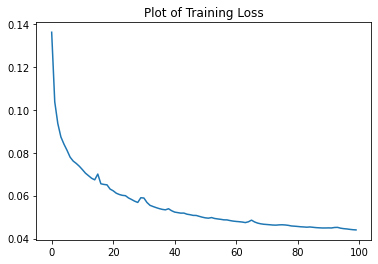

In [41]:
plt.figure()
plt.plot(plot_loss)
plt.title('Plot of Training Loss')

Text(0.5, 1.0, 'Plot of Validation Loss')

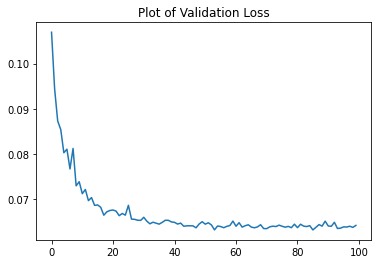

In [42]:
plt.figure()
plt.plot(validation_loss)
plt.title('Plot of Validation Loss')

### List of Validation Time-Signal for Clean Voice

In [43]:
validation_clean_signals_time=validation_data_time[1200:2400]

### Mask Matrix Ouput from LSTM Model for Validation Signals

In [44]:
validation_specto_after_training = model_lstm(Sn_reshaped_validation)
validation_specto_after_training1=validation_specto_after_training.cpu().data.numpy()
validation_specto_after_training2=validation_specto_after_training1.transpose(0,2,1)

In [45]:
validation_specto_after_training2.shape

(1200, 513, 178)

In [46]:
np.shape(Sn_validation_padded)

(1200, 513, 178)

### Spectogram_Ouput for Validation Signals

In [47]:
validation_specto_after_training3=np.multiply(validation_specto_after_training2,Sn_validation_padded)

### Function for SNR Calculation

In [48]:
def snr(ground_clean, recovered_one):
  import math
  a=min(len(ground_clean),len(recovered_one))

  ground1=ground_clean[0:a]
  recovered1=recovered_one[0:a]
  num=np.sum(np.square(ground1))
  diff=np.sum(np.square(ground1-recovered1))
  SNR=10*math.log(num/diff,10)
  return SNR

### For-Loop for Validation Signals and appending SNR in the snr_list for every validation signal

In [49]:
snr_list=[]
for k in range(len(validation_specto_after_training3)):
  arry_validation = librosa.core.istft(validation_specto_after_training3[k], hop_length=512)
  hj=snr(validation_clean_signals_time[k], arry_validation )
  snr_list.append(hj)


In [50]:
print ("The mean SNR is:",np.mean(snr_list))

The mean SNR is: 11.483324398891298


### Padding Function for TestSet

In [51]:
def function_Padded1(sn_train,max_column_train):
  ### Padding the training_samples:
  for i in range (len(sn_train)):
    sn_train[i]=np.hstack((sn_train[i],np.zeros((513,max_column_train-sn_train[i].shape[1]))))
  
  return sn_train

### Output after Padding test spectogram

In [52]:
test_data1_reshaped= function_Padded1(test_data1,max_column_test)

In [53]:
test_data1_reshaped1=np.abs(test_data1_reshaped)
test_data1_reshaped2=test_data1_reshaped1.transpose(0,2,1)

### Mask Ouput for test Signal

In [54]:
mask_ouput_for_test_signal=model_lstm(torch.FloatTensor(test_data1_reshaped2).cuda())

In [55]:
mask_ouput_for_test_signal1=mask_ouput_for_test_signal.cpu().data.numpy()
mask_ouput_for_test_signal2=mask_ouput_for_test_signal1.transpose(0,2,1)

In [56]:
test_data1_reshaped4=np.array(test_data1_reshaped)

## Final_Spectogram_Output_of_Test_Signal 

In [57]:
specto_ouput_final_for_test_signal=np.multiply(mask_ouput_for_test_signal2,test_data1_reshaped4)

In [58]:
np.shape(specto_ouput_final_for_test_signal)

(400, 513, 195)

In [70]:
i=0
for i in range(len(specto_ouput_final_for_test_signal)):
  a=librosa.core.istft(specto_ouput_final_for_test_signal[i], hop_length=512)
  librosa.output.write_wav('/content/drive/My Drive/ENGR-533/Final_Data/test'+str(i)+'.wav', a, sr=16000)

In [69]:
import IPython.display as ipd
ipd.display(ipd.Audio(librosa.core.istft(specto_ouput_final_for_test_signal[0], hop_length=512),rate=16000))